In this notebook, I quickly explore the competition images

In [80]:
import glob
from tqdm import tqdm
import pandas as pd
import cv2
import matplotlib.pylab as plt
import numpy as np
import os
%matplotlib inline

In [29]:
IMAGES_PATH = 'data/**/images/*.png'
TRAIN_LABELS_PATH = 'data/stage1_train_labels.csv'
ALL_IMAGE_IDS = set(next(os.walk('data'))[1])
# Could also be done using: ALL_IMAGE_IDS = [fp.split('/')[-1] for fp in glob.iglob('data/**/')]

In [30]:
TRAIN_IMAGE_IDS = set(train_labels_df.ImageId.unique())
TEST_IMAGE_IDS = ALL_IMAGE_IDS - TRAIN_IMAGE_IDS

In [34]:
len(ALL_IMAGE_IDS)

735

In [32]:
len(TRAIN_IMAGE_IDS)

670

In [33]:
len(TEST_IMAGE_IDS)

65

# Data exploration

In [82]:
def combine_masks(masks_paths):
    """ Combine the different masks of a single image into one mask
    """
    masks = []
    for mask_path in masks_paths:
        mask = cv2.imread(mask_path)
        masks.append(mask)
    return np.maximum.reduce(masks)
        

def plot_one_image(img_path):
    """Plot one image with its corrsponding masks.
    """
    masks_folder = os.path.abspath(os.path.join(img_path, os.pardir)).replace('images', 'masks')
    masks_paths = glob.glob(os.path.join(masks_folder, '*.png'))
    img_name = ntpath.basename(os.path.splitext(img_path)[0])
    fig, axes = plt.subplots(1, 2, figsize=(8, 8))   
    img = cv2.imread(img_path)
    axes[0].imshow(img)
    axes[0].set_title('Image')
    mask = combine_masks(masks_paths)
    axes[1].imshow(mask)
    fig.suptitle(img_name)
    axes[1].set_title('Mask')
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])

100%|██████████| 5/5 [00:00<00:00,  7.07it/s]


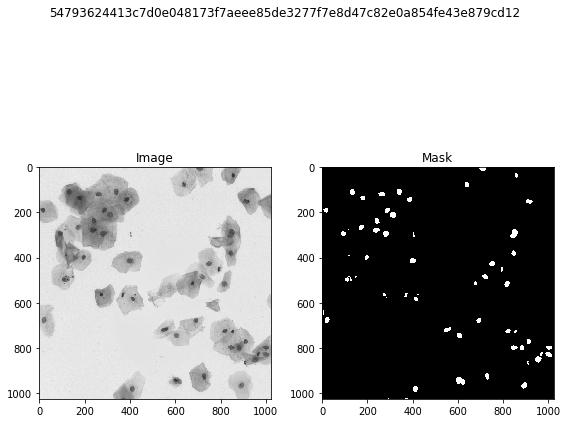

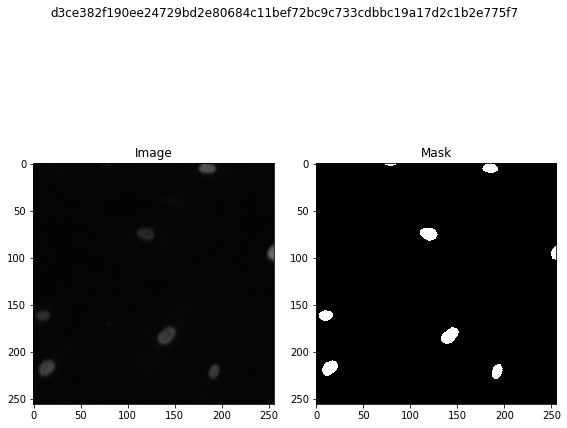

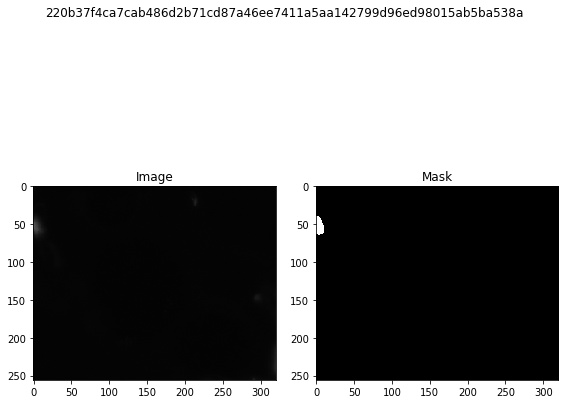

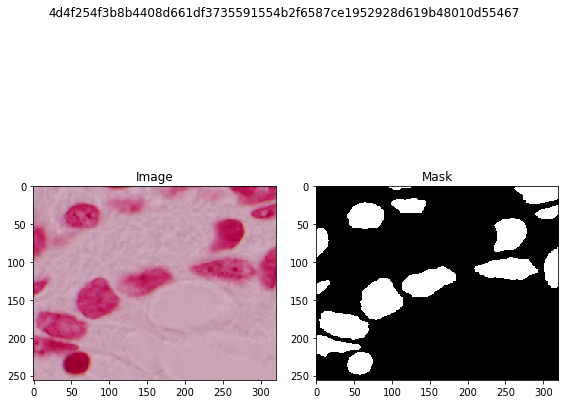

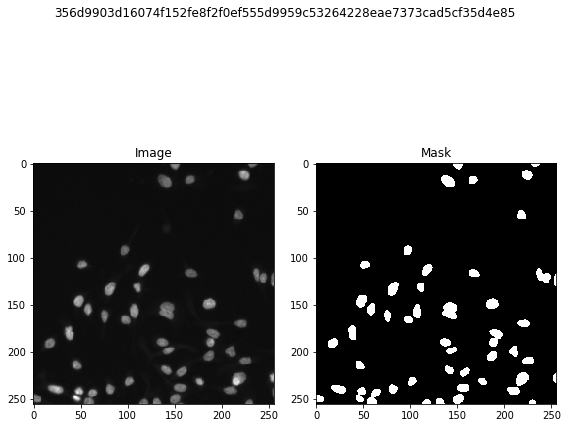

In [83]:
for fp in tqdm(glob.glob(IMAGES_PATH)[:5]):
    plot_one_image(fp)

The images come in different colors and shapes. Thus it is necessary to reshape and get a uniform color scale for the machine learning model.